# Car classification model

In [67]:
import torch.nn as nn
import torch
from torchvision import transforms

import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import os

## Directory

In [68]:
train_dir = r"C:\Users\alexy\Documents\deep_learning\excercises\reh_pract\project_2\car_data\car_data\train"
test_dir = r"C:\Users\alexy\Documents\deep_learning\excercises\reh_pract\project_2\car_data\car_data\test"

print(os.listdir(train_dir)[:11])
print(os.listdir(test_dir)[:11])
print(len(os.listdir(train_dir)))
print(len(os.listdir(test_dir)))


['Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'AM General Hummer SUV 2000', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012']
['Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'AM General Hummer SUV 2000', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012']
196
196


## Transform

In [69]:
img_size =  224
train_transform = transforms.Compose([transforms.Resize((img_size,img_size)),transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize((img_size,img_size)),transforms.ToTensor()])

## Dataset

In [78]:
train_data = ImageFolder(root=train_dir, transform=train_transform)
test_data = ImageFolder(root=test_dir, transform=test_transform)

## Loader 

In [71]:
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)

In [72]:
for img, label in train_loader:
    print(img.size(),label)
    break

torch.Size([64, 3, 224, 224]) tensor([147,  86, 161, 135,  33,  17,  93,  40, 182,  64, 124, 114, 151,  51,
        123, 194, 122,  25, 151, 131,  50,  32, 187, 109, 109,  87,  80,  31,
         41,  63,   3, 128,  31,  81, 112,  56, 138, 146, 177,  80, 108,  64,
        161, 135,  19,  27,  34,  76, 116,  97,  43,   0, 170, 164, 192, 123,
        156, 130, 129,  23, 115, 120, 120, 166])


In [73]:
list(train_data.classes)

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

In [74]:
len(list(train_data.classes))

196

## CNN model

In [59]:
#w-ks+2p/s + 1
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        #first convolutional layer, original input image size: 224*224*3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1)
        #after conv1, before pooling: 222*222*16
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        #after conv1, after pooling: 111*111*16
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1)
        #after conv2, before pooling: 109*109*32
        #after conv2, after pooling: 54*54*32
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        #after conv3, before pooling: 52*52*64
        #after conv3, after pooling: 26*26*64
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1)
        #after conv4, before pooling: 24*24*128
        #after conv4, after pooling:  12*12*128
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1)
        #after conv5, before pooling: 10*10*256
        #after conv5, after pooling:  5*5*256
        
        self.fc1 = nn.Linear(5*5*256, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, len(list(train_data.classes)))
        
        self.relu = nn.ReLU()
        
    
    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv4(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv5(x)
        x = self.relu(x)
        x = self.pool(x)
        
        out = x.view(-1, 5*5*256)
        
        out = self.fc1(out)
        out = self.relu(out)
        
        out = self.fc2(out)
        out = self.relu(out)
        
        out = self.fc3(out)
        
        return out

In [60]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [61]:
device

device(type='cuda', index=0)

In [62]:
model = CNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimiser = optim.Adam(params=model.parameters(), lr=0.001)

In [63]:
import time
import matplotlib.pyplot as plt

## Training 

In [64]:
def train(model, loss_fn, optimiser, epochs=10):
    training_loss, training_accuracy = [], []
    testing_loss, testing_accuracy = [],[]
    
    for epoch in range(epochs):
        model.train()
        train_loss, train_accuracy = 0.0, 0.0
        for img, label in train_loader:
            start = time.time()
            optimiser.zero_grad()
            img = img.to(device)
            label = label.to(device)
            output = model(img)

            loss = loss_fn(output, label)
            loss.backward()
            optimiser.step()

            train_loss += loss.data.item()
            

            prediction = torch.argmax(output, 1)
            train_accuracy += (prediction==label).sum().item()
            
        model.eval()
        test_loss, test_accuracy =0.0, 0.0

        with torch.no_grad():
            for img, label in test_loader:
                img = img.to(device)
                label = label.to(device)
                
                output = model(img)
                loss = loss_fn(output, label)
                

                test_loss += loss.data.item()
                

                prediction = torch.argmax(output, 1)
                test_accuracy += (prediction==label).sum().item()
                

        training_loss.append(train_loss/len(train_loader))
        training_accuracy.append(train_accuracy/len(train_data))
        testing_loss.append(test_loss/len(test_loader))
        testing_accuracy.append(test_accuracy/len(test_data))
        
        end = time.time()
        
        print('Epoch: {}/{} Train Loss: {:.5f} Train Accuracy: {:.5f} Test Accuracy: {:.5f} Test Loss: {:.5f} - {:.5f}secs'.format(
                epoch+1, epochs, train_loss/len(train_loader), train_accuracy/len(train_data), test_accuracy/len(test_loader), test_loss/len(test_data), end-start))
    
    plt.plot(range(epochs), training_accuracy, label="train accuracy")
    plt.plot(range(epochs), testing_accuracy, label="test accuracy")
    plt.show()

    plt.plot(range(epochs), training_loss, label="train loss")
    plt.plot(range(epochs), testing_loss, label="test loss")
    plt.show()

        

Epoch: 1/10 Train Loss: 5.27989 Train Accuracy: 0.00479 Test Accuracy: 0.34127 Test Loss: 0.08269 - 82.66551secs
Epoch: 2/10 Train Loss: 5.27805 Train Accuracy: 0.00675 Test Accuracy: 0.53968 Test Loss: 0.08267 - 83.85330secs
Epoch: 3/10 Train Loss: 5.27716 Train Accuracy: 0.00835 Test Accuracy: 0.53968 Test Loss: 0.08265 - 82.12001secs
Epoch: 4/10 Train Loss: 5.27649 Train Accuracy: 0.00835 Test Accuracy: 0.53968 Test Loss: 0.08264 - 84.36485secs
Epoch: 5/10 Train Loss: 5.27561 Train Accuracy: 0.00835 Test Accuracy: 0.53968 Test Loss: 0.08263 - 85.50935secs
Epoch: 6/10 Train Loss: 5.27569 Train Accuracy: 0.00835 Test Accuracy: 0.53968 Test Loss: 0.08264 - 89.24351secs
Epoch: 7/10 Train Loss: 5.27501 Train Accuracy: 0.00835 Test Accuracy: 0.53968 Test Loss: 0.08263 - 84.88898secs
Epoch: 8/10 Train Loss: 5.27510 Train Accuracy: 0.00835 Test Accuracy: 0.53968 Test Loss: 0.08263 - 82.16325secs
Epoch: 9/10 Train Loss: 5.27484 Train Accuracy: 0.00835 Test Accuracy: 0.53968 Test Loss: 0.0826

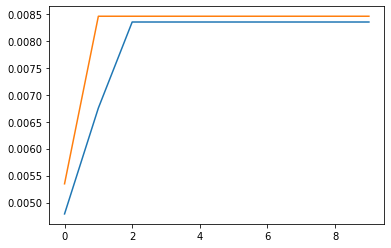

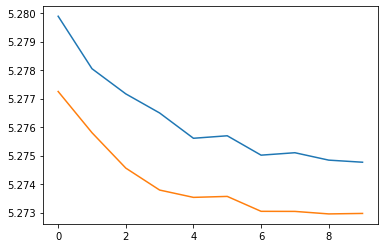

In [65]:
train(model, loss_fn, optimiser)

In [75]:
device

device(type='cuda', index=0)

In [76]:
len(train_data)

8144

In [79]:
len(test_data)

8041